# Data Loading

In [100]:
pd.set_option('display.max_columns', 500)
data = pd.read_csv("./data/공모주_데이터.csv")
data.head()

,종목명,예측일,공모희망가_원,공모가_원,공모금액_백만원,기관경쟁률,의무보유확약_퍼센트,주간사,시초가
0,위니아에이드,2022.06.09,"14,200~16,200","16,200","76,198",955:1,1.39%,신한금융투자,"14,600"
1,레이저쎌,2022.06.09,"12,000~14,000","16,000","19,200",1442.95:1,12.43%,삼성증권,"20,600"
2,KB스팩21호,2022.06.08,"2,000~2,000","2,000","15,000",NaN,-,KB증권,"2,100"
3,교보스팩12호,2022.06.08,"2,000~2,000","2,000","11,500",NaN,-,교보증권,"2,075"
4,보로노이,2022.06.08,"40,000~46,000","40,000","52,000",28.35 :1,-,"한국투자증권,미래에셋증권","36,000"


# Preprocessing

## strip

크롤링 작업으로 인해 ```\xa0```가 데이터에 붙혀져있다. 제거해야한다.

## split

```~```, ```:```, ```%```가 있어서 split해준다.

## replace

가격의 경우, ```,```(comma)가 있어 replacing을 한다.

## - 처리

```공모금액_백만원```, ```기관경쟁률```, ```의무보유확약_퍼센트```, ```시초가``` 컬럼의 경우 ```-``` 데이터가 있는 경우가 있어 처리

---

정리

In [101]:
data['공모가_원']=data['공모가_원'].str.strip()
data['공모금액_백만원']=data['공모금액_백만원'].str.strip()
data['기관경쟁률']=data['기관경쟁률'].str.strip()
data['의무보유확약_퍼센트']=data['의무보유확약_퍼센트'].str.strip()
data['시초가']=data['시초가'].str.strip()

data['하한가']=data['공모희망가_원'].str.split('~',expand=True)[0]
data['상한가']=data['공모희망가_원'].str.split('~',expand=True)[1]
data['의무보유확약_퍼센트']=data['의무보유확약_퍼센트'].str.split('%',expand=True)[0]
data['기관경쟁률']=data['기관경쟁률'].str.split(':',expand=True)[0]

data['공모가_원']=data['공모가_원'].apply(lambda x: x.replace(',',''))
data['하한가']=data['하한가'].apply(lambda x: x.replace(',',''))
data['상한가']=data['상한가'].apply(lambda x: x.replace(',',''))
data['시초가']=data['시초가'].apply(lambda x: x.replace(',',''))
data['공모금액_백만원']=data['공모금액_백만원'].apply(lambda x: x.replace(',',''))
data['기관경쟁률']=data['기관경쟁률'].apply(lambda x: x.replace(',','') if type(x) != float else x)

### 공모금액

In [64]:
data[data['공모금액_백만원']=='-']

,종목명,예측일,공모희망가_원,공모가_원,공모금액_백만원,기관경쟁률,의무보유확약_퍼센트,주간사,시초가,하한가,상한가
245,이베스트스팩5호,2020.05.06,"2,000~2,000",2000,-,NaN,-,이베스트투자증권,2000,2000,2000
255,신영스팩6호,2020.01.29,"2,000~2,000",2000,-,NaN,-,신영증권,2000,2000,2000
289,아이티엠반도체,2019.10.24,"23,000~26,000",26000,-,1078.5,15.80,케이비증권,26750,23000,26000


38.co.kr에서 직접 확인하여 채운다.

### 의무보유확약

In [65]:
data[data['의무보유확약_퍼센트']=='-']

,종목명,예측일,공모희망가_원,공모가_원,공모금액_백만원,기관경쟁률,의무보유확약_퍼센트,주간사,시초가,하한가,상한가
2,KB스팩21호,2022.06.08,"2,000~2,000",2000,15000,NaN,-,KB증권,2100,2000,2000
3,교보스팩12호,2022.06.08,"2,000~2,000",2000,11500,NaN,-,교보증권,2075,2000,2000
4,보로노이,2022.06.08,"40,000~46,000",40000,52000,28.35,-,"한국투자증권,미래에셋증권",36000,40000,46000
8,하나금융스팩22호,2022.05.11,"2,000~2,000",2000,10000,NaN,-,하나금융투자,2160,2000,2000
10,마스턴프리미어리츠(유가),2022.05.02,"5,000~5,000",5000,59300,NaN,-,삼성증권,5750,5000,5000
...,...,...,...,...,...,...,...,...,...,...,...
317,나노브릭,2019.08.01,"18,000~22,000",16000,8208,39.3,-,KB증권,14400,18000,22000
318,미래에셋대우스팩3호,2019.07.31,"2,000~2,000",2000,12300,NaN,-,미래에셋대우,2120,2000,2000
323,세경하이테크,2019.07.17,"46,000~52,000",35000,46000,10.71,-,키움증권,33250,46000,52000
325,한국바이오젠,2019.07.17,"4,700~5,700",6000,8387,1087.6,-,미래에셋대우,12000,4700,5700


* 의무보유확약은 0으로 채운다. 

### 기관경쟁률

기관경쟁률을 0으로 na값을 채운다.

---

정리

In [102]:
#이베스트스팩5호
data.loc[245,'공모금액_백만원']= "7000"
data.loc[245,'의무보유확약_퍼센트']= 0

#신영스팩6호
data.loc[255,'공모금액_백만원']= "8400"
data.loc[255,'의무보유확약_퍼센트']= 0

#아이티엠반도체
data.loc[289,'공모금액_백만원']= "131300"
data.loc[289,'의무보유확약_퍼센트']= 0

#의무보유확약 replace
data['의무보유확약_퍼센트']=data['의무보유확약_퍼센트'].replace('-',0)

#기관경쟁률 0으로 채우기
data['기관경쟁률'].fillna(0,inplace=True)

## astype

In [103]:
data['공모가_원']=data['공모가_원'].astype('int')
data['공모금액_백만원']=data['공모금액_백만원'].astype('int')
data['기관경쟁률']=data['기관경쟁률'].astype('float')
data['의무보유확약_퍼센트']=data['의무보유확약_퍼센트'].astype('float')
data['시초가']=data['시초가'].astype('int')
data['하한가']=data['하한가'].astype('int')
data['상한가']=data['상한가'].astype('int')

## drop

시초가에 영향을 주지 않을 컬럼을 지운다.

In [104]:
data.drop(['예측일','공모희망가_원','주간사'],1,inplace=True)

---

In [105]:
financial_statements = pd.read_csv("./data/공모주_재무제표.csv")
financial_statements.columns = ['종목명', '회사명종목코드', '상장일', '결산년도', '결산월', '업종', '자산', '부채', '자본',
       '매출액(수익)', '매출액(수익)증감률', '영업이익', '영업이익(증감률)', '당기순이익', '당기순이익(증감률)']
financial_statements = financial_statements.drop(['회사명종목코드','업종','매출액(수익)증감률','영업이익(증감률)','당기순이익(증감률)','상장일'],1)

In [106]:
df= data.merge(financial_statements)

In [107]:
len(df)

213

In [108]:
df.fillna(0,inplace=True)

---

In [109]:
train = df[13:]
test = df[:13]
target= test['시초가']
test.drop(['시초가'],1,inplace=True)

In [78]:
from IPython.core.display import HTML

def value_counts_all(df, columns):
    pd.set_option('display.max_rows',50)
    table_list=[]
    for col in columns:
        table_list.append(pd.DataFrame(df[col].value_counts()))
    return HTML(f"<table><tr> {''.join(['<td>'+table._repr_html_() + '</td>' for table in table_list])} </tr></table>")

value_counts_all(train,train.columns)

,종목명
노을,1
제놀루션,1
셀레믹스,1
브랜드엑스코퍼레이션,1
미투젠,1
...,...
유진스팩6호,1
엔시스,1
자이언트스텝,1
제노코,1


In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 13 to 212
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   종목명         200 non-null    object 
 1   공모가_원       200 non-null    int64  
 2   공모금액_백만원    200 non-null    int64  
 3   기관경쟁률       200 non-null    float64
 4   의무보유확약_퍼센트  200 non-null    float64
 5   시초가         200 non-null    int64  
 6   하한가         200 non-null    int64  
 7   상한가         200 non-null    int64  
 8   결산년도        200 non-null    object 
 9   결산월         200 non-null    object 
 10  자산          200 non-null    int64  
 11  부채          200 non-null    int64  
 12  자본          200 non-null    int64  
 13  매출액(수익)     200 non-null    int64  
 14  영업이익        200 non-null    int64  
 15  당기순이익       200 non-null    int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 26.6+ KB


In [80]:
train.shape

(200, 16)

In [81]:
train.isnull().sum()

종목명           0
공모가_원         0
공모금액_백만원      0
기관경쟁률         0
의무보유확약_퍼센트    0
시초가           0
하한가           0
상한가           0
결산년도          0
결산월           0
자산            0
부채            0
자본            0
매출액(수익)       0
영업이익          0
당기순이익         0
dtype: int64

# EDA

In [82]:
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline

rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

In [83]:
cat_cols = train.select_dtypes(include='object').columns.tolist()
num_cols = train.select_dtypes(exclude='object').columns.tolist()

<Figure size 1152x1440 with 0 Axes>

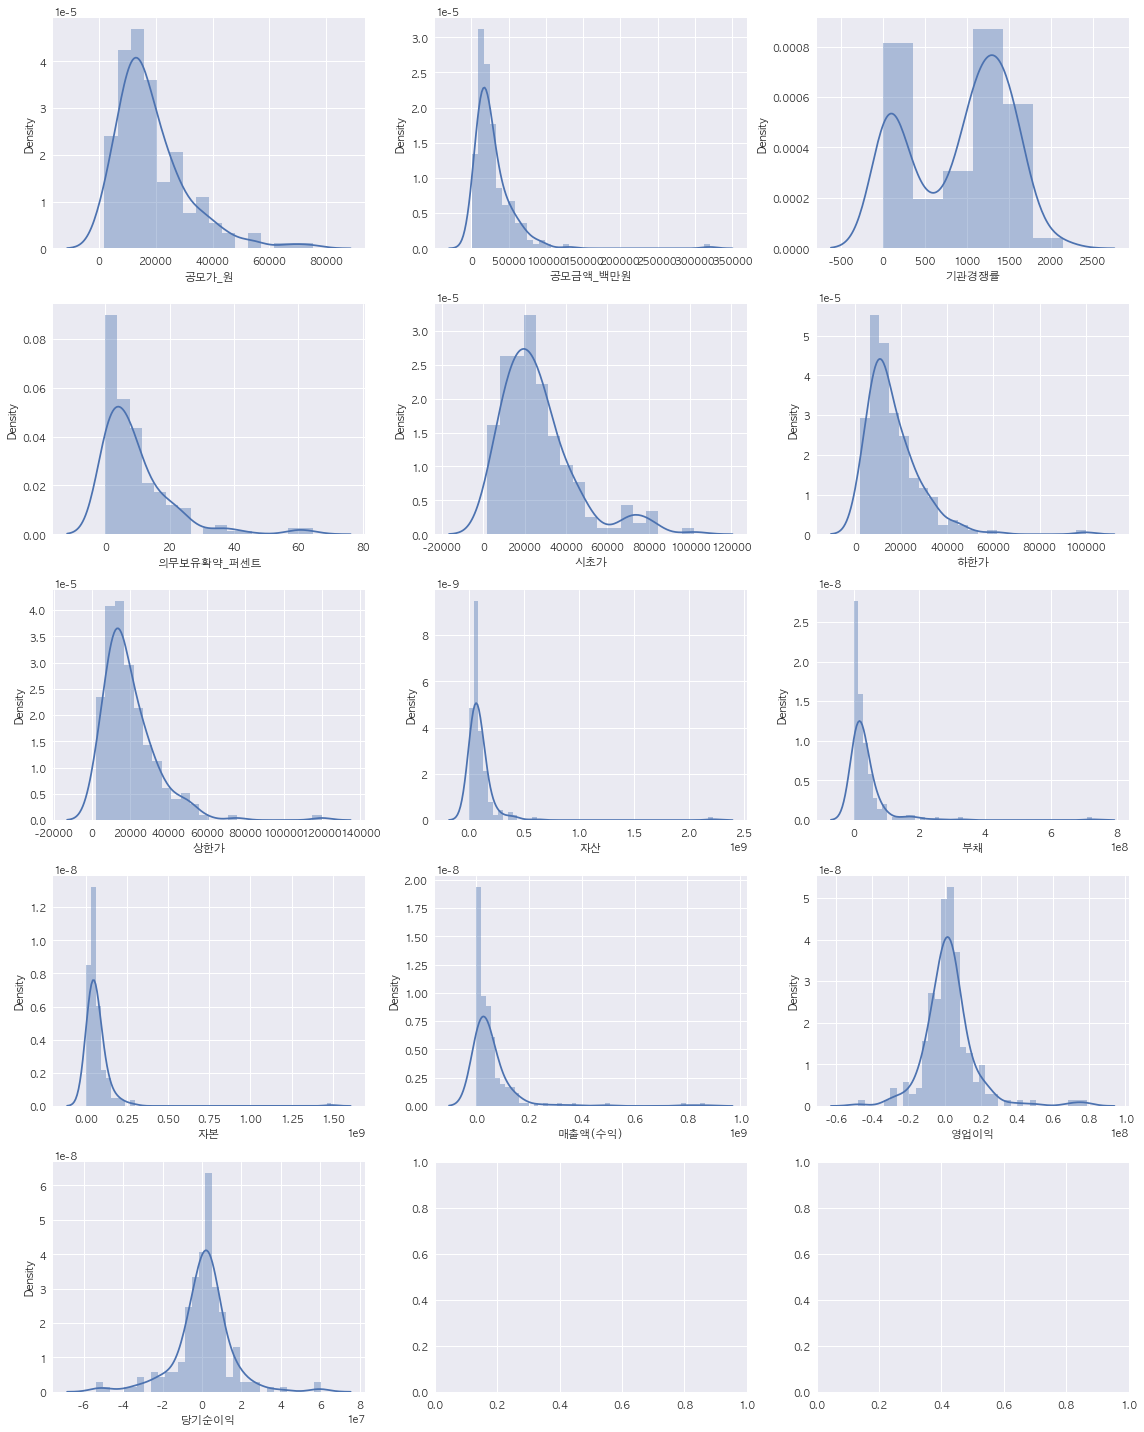

In [84]:
def show_dist_plot(df, columns):
    i = 0 
    plt.figure(figsize=(16,20))
    f,ax = plt.subplots(5,3,figsize=(16,20))
    for col in columns:
        i+=1
        plt.subplot(5,3,i)
        sns.distplot(df[col])
    plt.tight_layout()
    
show_dist_plot(train, num_cols)

이상치 지우기

In [85]:
from feature_engine.outliers import OutlierTrimmer

trimmer = OutlierTrimmer(capping_method='iqr')
train = trimmer.fit_transform(train)

<Figure size 1152x1440 with 0 Axes>

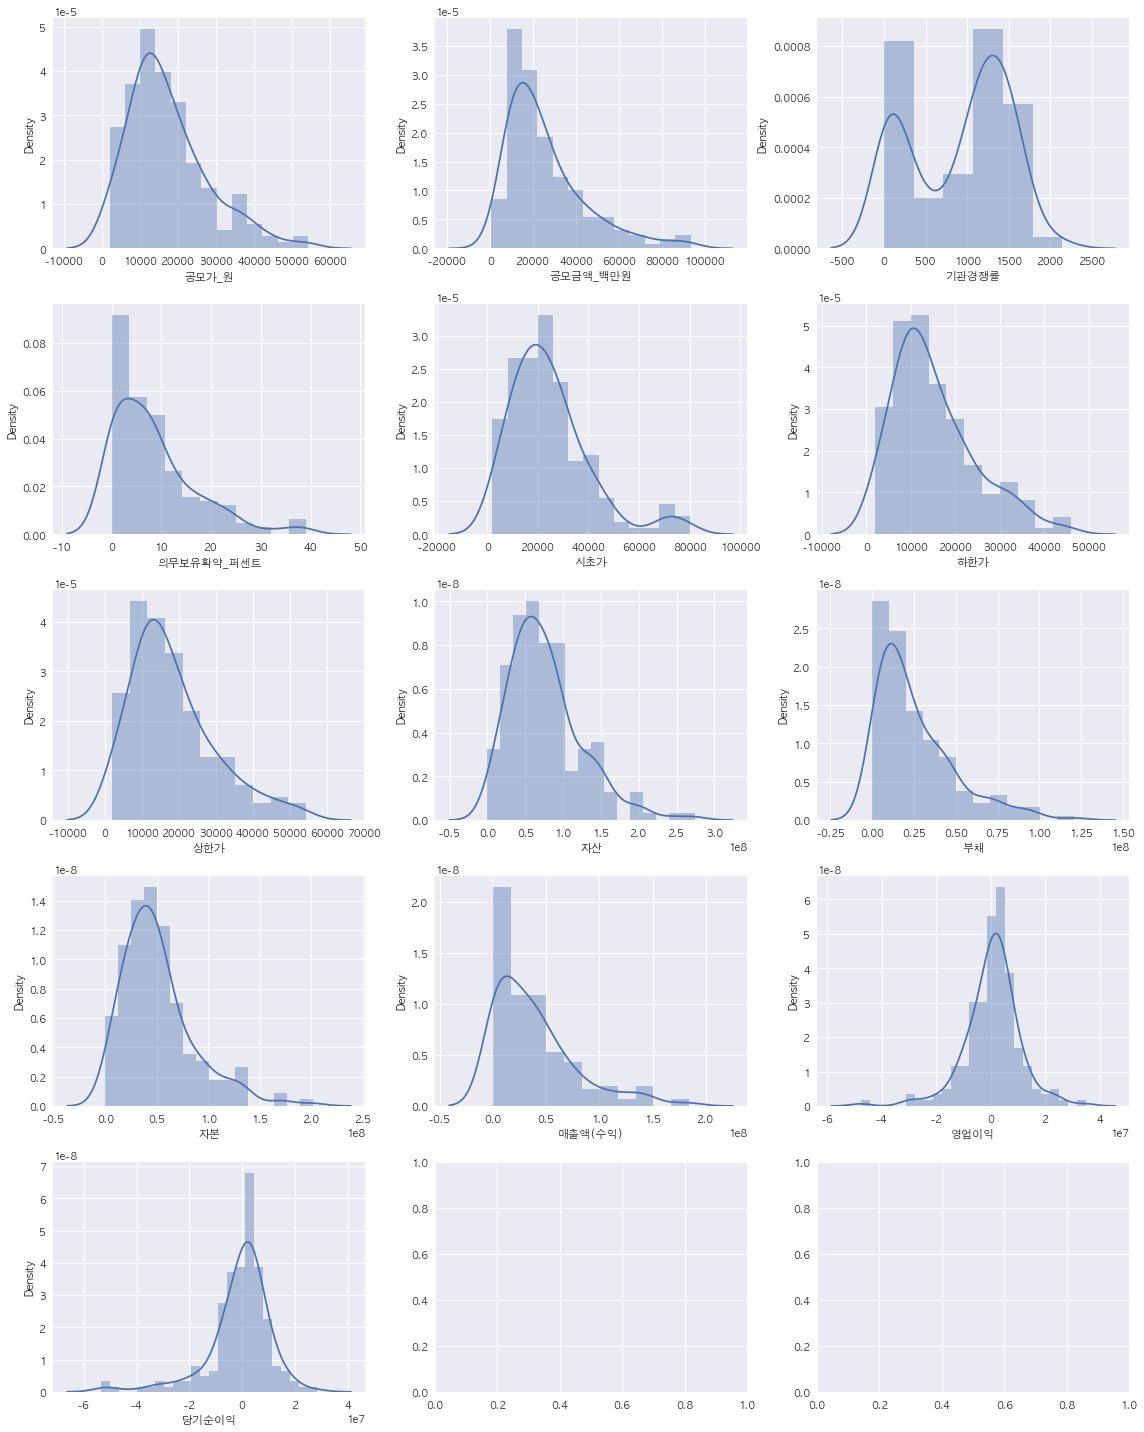

In [86]:
def show_dist_plot(df, columns):
    i = 0 
    plt.figure(figsize=(16,20))
    f,ax = plt.subplots(5,3,figsize=(16,20))
    for col in columns:
        i+=1
        plt.subplot(5,3,i)
        sns.distplot(df[col])
    plt.tight_layout()
    
show_dist_plot(train, num_cols)

# Feature engineering

In [110]:
train['스팩유무']=train['종목명'].apply(lambda x: 1 if x.find('스팩')>=0 else 0)
test['스팩유무']=test['종목명'].apply(lambda x: 1 if x.find('스팩')>=0 else 0)

In [111]:
train['부채비율']=train['부채']/train['자산']
test['부채비율']=test['부채']/test['자산']

In [112]:
train['자기자본비율']= train['자본']/train['자산']
test['자기자본비율']= test['자본']/test['자산']

<AxesSubplot:>

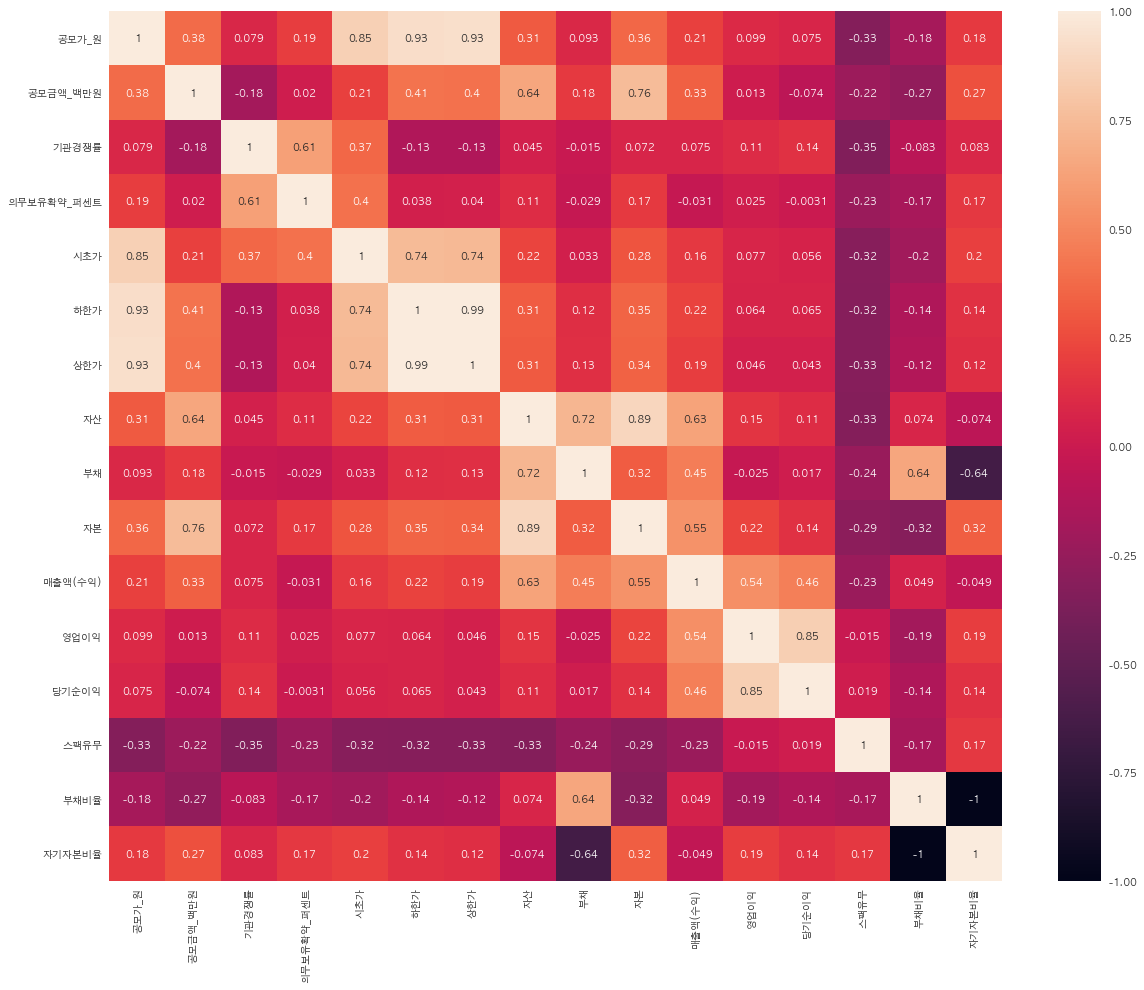

In [90]:
plt.figure(figsize=(20,16))
sns.heatmap(train.corr(),annot=True)